## Dependencias 

In [20]:
import numpy as np 
import pandas as pd 
from CreditScoringToolkit.frequency_table import frequency_table #pip install woe-credit-scoring
from sklearn.model_selection import train_test_split

## Lectura de datos 

In [4]:
df = pd.read_sas('data/churn.sas7bdat')
print(df.shape)
df.head()

(2801, 14)


,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128.0,b'No',b'Yes',25.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,0.0,1.0
1,107.0,b'No',b'Yes',26.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,0.0,2.0
2,137.0,b'No',b'No',0.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,0.0,3.0
3,65.0,b'No',b'No',0.0,21.95,83.0,19.42,111.0,9.40,6.0,3.43,4.0,1.0,11.0
4,168.0,b'No',b'No',0.0,21.90,71.0,8.92,128.0,6.35,2.0,3.02,1.0,0.0,13.0


## Limpieza 

### Categorización de variables 

In [9]:
varc = [v for v in df.columns if v[:2]=='V_']
vard = [v for v in df.columns if v[:2]=='C_']
vart = ['TARGET']
um = ['ID']

### Reasignar etiquetas de variables discretas 

In [10]:
for v in vard:
    df[v] = (df[v] == b'Yes').astype(float)

In [11]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128.0,0.0,1.0,25.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,1.0,0.0,1.0
1,107.0,0.0,1.0,26.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,1.0,0.0,2.0
2,137.0,0.0,0.0,0.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,0.0,0.0,3.0
3,65.0,0.0,0.0,0.0,21.95,83.0,19.42,111.0,9.40,6.0,3.43,4.0,1.0,11.0
4,168.0,0.0,0.0,0.0,21.90,71.0,8.92,128.0,6.35,2.0,3.02,1.0,0.0,13.0


## Partición

In [13]:
rs = np.random.RandomState(20240903)

In [14]:
train,valid =train_test_split(df[um+vart+vard+varc],
                              train_size=0.7,
                              random_state=rs)

In [15]:
train.reset_index(drop=True,inplace=True)
valid.reset_index(drop=True,inplace=True)   

In [16]:
train.shape,valid.shape

((1960, 14), (841, 14))

## Análisis exploratorio de datos 

### Discreto

In [21]:
frequency_table(train,vard)

****Frequency Table  C_IP  ***


     Abs. Freq.  Rel. Freq.  Cumm. Abs. Freq.  Cumm. Rel. Freq.
0.0        1772    0.904082              1772          0.904082
1.0         188    0.095918              1960          1.000000




****Frequency Table  C_VMP  ***


     Abs. Freq.  Rel. Freq.  Cumm. Abs. Freq.  Cumm. Rel. Freq.
0.0        1440    0.734694              1440          0.734694
1.0         520    0.265306              1960          1.000000






### Continuo

#### Ausentes 

In [24]:
miss = train[varc].isna().sum()
miss 

V_ACCT_LGHT      0
V_N_VM_MESS      0
V_T_DAY_CHG      0
V_T_EVE_CALLS    0
V_T_EVE_CHG      0
V_T_NIG_CALLS    0
V_T_NIG_CHG      0
V_T_INT_CALLS    0
V_T_INT_CHG      0
V_CS_CALLS       0
dtype: int64

#### Distribución

array([[<Axes: title={'center': 'V_ACCT_LGHT'}>,
        <Axes: title={'center': 'V_N_VM_MESS'}>,
        <Axes: title={'center': 'V_T_DAY_CHG'}>],
       [<Axes: title={'center': 'V_T_EVE_CALLS'}>,
        <Axes: title={'center': 'V_T_EVE_CHG'}>,
        <Axes: title={'center': 'V_T_NIG_CALLS'}>],
       [<Axes: title={'center': 'V_T_NIG_CHG'}>,
        <Axes: title={'center': 'V_T_INT_CALLS'}>,
        <Axes: title={'center': 'V_T_INT_CHG'}>],
       [<Axes: title={'center': 'V_CS_CALLS'}>, <Axes: >, <Axes: >]],
      dtype=object)

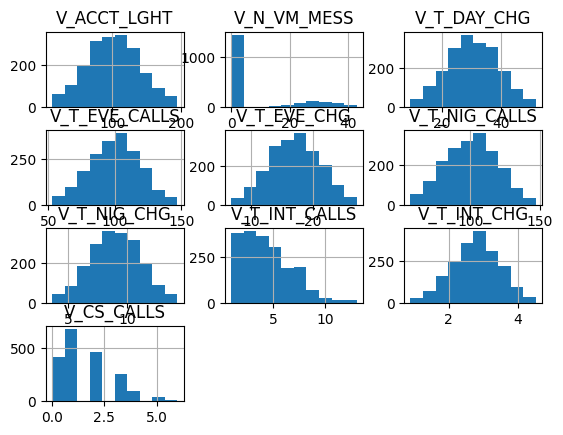

In [25]:
train[varc].hist()

#### Extremos 

In [32]:
# Cerca percentil
for v,li,ls in train[varc].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    train[f'ex_{v}'] = ((train[v]<li)|(train[v]>ls)).astype(int)
train['ex_'] = train.filter(like='ex_').max(axis=1)
frequency_table(train,'ex_')


****Frequency Table  ex_  ***


   Abs. Freq.  Rel. Freq.  Cumm. Abs. Freq.  Cumm. Rel. Freq.
0        1655    0.844388              1655          0.844388
1         305    0.155612              1960          1.000000




